# Linear Regression with Libraries

house price prediction based on area of house using numpy and pandas

# Data Set import

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random

In [101]:
df=pd.read_csv("Price.csv")

In [102]:
df.head()

,Area (sqft),Price ($)
0,2000,88600
1,1600,71600
2,1980,93300
3,1840,84300
4,1710,80600


 # EDA

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Area (sqft)  40 non-null     int64
 1   Price ($)    40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [104]:
df.shape

(40, 2)

In [105]:
df.describe()

,Area (sqft),Price ($)
count,40.000000,40.00000
mean,1660.250000,79347.00000
std,169.395418,6840.44503
min,1400.000000,68700.00000
25%,1535.000000,73900.00000
50%,1610.000000,79100.00000
75%,1762.500000,83525.00000
max,2000.000000,93300.00000


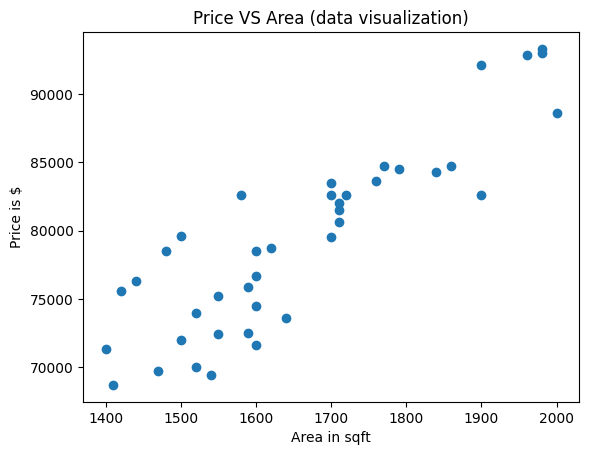

In [114]:
plt.scatter(df['Area (sqft)'],df['Price ($)'])
plt.xlabel("Area in sqft")
plt.ylabel("Price is $")
plt.title("Price VS Area (data visualization)")
plt.show()

   # split data into train and test

In [107]:
p=int(0.8*len(df))
train=df[:p]
test=df[p:]
x=np.linspace(1400,2000,40)

# maths

Linear regression algorithm aims to find best fitting line that has least error(or distance) from the values. 

Equation of a line: y=mx+c 

In linear regression, x is the independent variable(s) and y is the dependent variable. Putting this into the equation we can say that, if we know the m or slope and the intercept(c) then we can calculate the value of y for a specific value of x.
Accuracy of this value on being compared to actual value of y depends on m and c i.e. how well we have calculated the slope and intercept that gives lowest error (or how close the line is to the actual data point)

# Let's find out best fit line

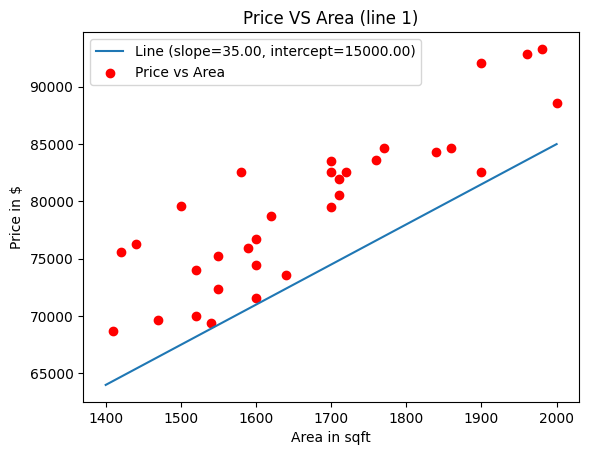

In [108]:
#let's try finding best fit line slop=35 and c=15000
slope=35
intercept=15000
line_y = slope * x + intercept
# Create line plot
plt.plot(x, line_y, label=f'Line (slope={slope:.2f}, intercept={intercept:.2f})')
# Scatter plot for Area vs Price
plt.scatter(train['Area (sqft)'], train['Price ($)'], color='red', label='Price vs Area')
plt.xlabel("Area in sqft")
plt.ylabel("Price in $")
plt.title("Price VS Area (line 1)")
plt.legend()
plt.show()


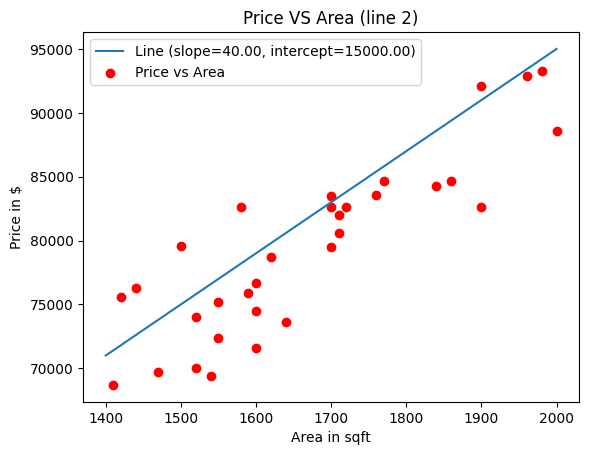

In [109]:
#let's try finding best fit line slop=40 and c=15000
slope=40
intercept=15000
line_y = slope * x + intercept
# Create line plot
plt.plot(x, line_y, label=f'Line (slope={slope:.2f}, intercept={intercept:.2f})')
# Scatter plot for Area vs Price
plt.scatter(train['Area (sqft)'], train['Price ($)'], color='red', label='Price vs Area')
plt.xlabel("Area in sqft")
plt.ylabel("Price in $")
plt.title("Price VS Area (line 2)")
plt.legend()
plt.show()


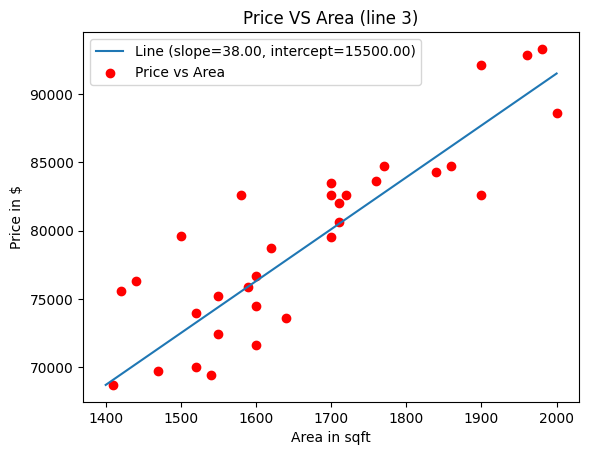

In [110]:
#let's try finding best fit line slop=37 and c=15500
slope=38
intercept=15500
line_y = slope * x + intercept
# Create line plot
plt.plot(x, line_y, label=f'Line (slope={slope:.2f}, intercept={intercept:.2f})')
# Scatter plot for Area vs Price
plt.scatter(train['Area (sqft)'], train['Price ($)'], color='red', label='Price vs Area')


plt.xlabel("Area in sqft")
plt.ylabel("Price in $")
plt.title("Price VS Area (line 3)")
plt.legend()
plt.show()


As we can see among these 3 lines, the line with slope=38 and intercept=15500 gives the best fit. (We can try for other combinations)

In [111]:
df_predict=pd.DataFrame(line_y)
df_predict_train=df_predict[:32]
df_predict_test=df_predict[32:]


# RMSE

Let's Calculate Root mean squared error metric

In [112]:
#rmse for train
error=df_predict_train[0]-train["Price ($)"]
se=[x**2 for x in error]
mse=np.mean(se)
rmse_train=np.sqrt(mse)
print(f"RMSE value for train data: {rmse_train:.1f}")

#rmse for test
error=test["Price ($)"]-df_predict_test[0]
se=[x**2 for x in error]
mse=np.mean(se)
rmse_test=np.sqrt(mse)
print(f"RMSE value for test data: {rmse_test:.1f}")

RMSE value for train data: 8979.3
RMSE value for test data: 12854.3


# Finding the best fit line (automated)

We can iterate over values of slope and intercept to find best fit line that gives least RMSE value

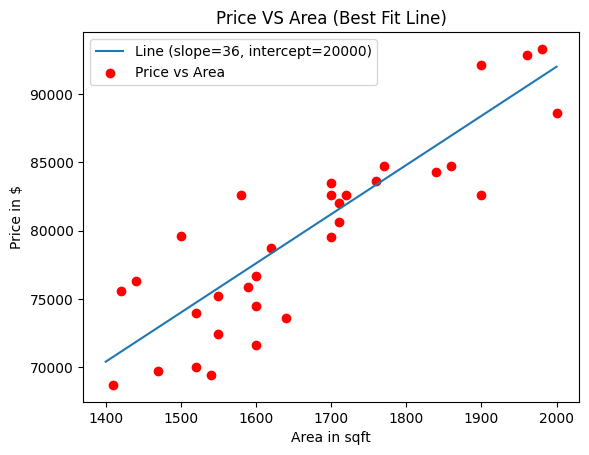

Best RMSE: 8650.934861793156
Best Slope: 36
Best Intercept: 20000


In [113]:
best_rmse = float('inf')  
best_slope = None
best_intercept = None
slope = range(33, 43)
intercept = np.arange(15000, 20001, 500)

for i in slope:
    for j in intercept:
        line_y = i * x + j
        df_predict = pd.DataFrame(line_y, columns=["Predicted"])  
        df_predict_train = df_predict.iloc[:32]  
        df_predict_test = df_predict.iloc[32:]  

#         # Calculate RMSE for test set
#         error =test["Price ($)"]- df_predict_test["Predicted"]
#         se=[x**2 for x in error]
#         mse=np.mean(se)
#         rmse_test=np.sqrt(mse)
        # Calculate RMSE for train set
        error =train["Price ($)"]- df_predict_train["Predicted"]
        se=[x**2 for x in error]
        mse=np.mean(se)
        rmse_train=np.sqrt(mse)
        
        if rmse_train < best_rmse:
            best_slope = i
            best_intercept = j
            best_rmse = rmse_train
            
line_y = best_slope * x + best_intercept
# Create line plot
plt.plot(x, line_y, label=f'Line (slope={best_slope}, intercept={best_intercept})')
# Scatter plot for Area vs Price
plt.scatter(train['Area (sqft)'], train['Price ($)'], color='red', label='Price vs Area')

# Adding labels and title
plt.xlabel("Area in sqft")
plt.ylabel("Price in $")
plt.title("Price VS Area (Best Fit Line)")
plt.legend()
plt.show()
print(f"Best RMSE: {best_rmse}")
print(f"Best Slope: {best_slope}")
print(f"Best Intercept: {best_intercept}")
